In [1]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import random
import requests
import json
import time
import matplotlib.pyplot as plt

from scipy import stats
from citipy import citipy
from config import wkey


In [2]:
#Num of samples for project

smpl = 20
# create a list of lat and lngs
slat = np.random.uniform(low=-90.000, high=90.000, size=smpl)
slng = np.random.uniform(low=-180.000, high=180.000, size=smpl)


#add list to dict then start a dataframe
samples = {
    'rand_lat':slat,
    'rand_lng':slng
          }

df1 = pd.DataFrame(samples)
df1.shape
df1.head()


,rand_lat,rand_lng
0,-72.452328,119.018772
1,71.090700,-99.619184
2,-53.296103,80.638252
3,14.289444,-82.882470
4,61.891377,98.111187


In [3]:
#use citipy to find nearest city and populate dataframe

df1['Nearest_City']=''
df1['Country']=''
    

for index, row in df1.iterrows():
    
    #row vars
    lat = row['rand_lat']
    lng = row['rand_lng']

   #populate cells
    try:
        df1.loc[index, ['Nearest_City']]   = citipy.nearest_city(lat, lng).city_name
        df1.loc[index, ['Country']]   = citipy.nearest_city(lat, lng).country_code
        
    except:
        pass
  
df1.head(8)

,rand_lat,rand_lng,Nearest_City,Country
0,-72.452328,119.018772,albany,au
1,71.090700,-99.619184,thompson,ca
2,-53.296103,80.638252,busselton,au
3,14.289444,-82.882470,puerto cabezas,ni
4,61.891377,98.111187,baykit,ru
5,86.122772,-114.990850,yellowknife,ca
6,-3.722863,-18.744882,georgetown,sh
7,-81.239421,-58.173796,ushuaia,ar


In [4]:
#add columns for Temp, Humid, Cloudiness, and Windspeed then populate via API
df1['Temperature_F']=''
df1['Humidity_Perc']=''
df1['Cloudiness_Perc']=''
df1['Wind_Speed_MPH'] =''


In [5]:
#call openweathermap endpoint to get weather metrics and populate dataframe

city ='' #this is just used to print out data as the API is executing
cntry ='' #this is just used to print out data as the API is executing
response_time ='' #this is just used to print out data as the API is executing
code = '' #this is just used to print out data as the API is executing

for index, row in df1.iterrows():
    
    #build query url
    city  = row['Nearest_City']
    cntry = row['Country']
    qurl  = f'http://api.openweathermap.org/data/2.5/weather?q={city},{cntry}&units=imperial&appid={wkey}'

    
    #build a response json object
    response = requests.get(qurl)
    response_json = response.json()

   #populate cells
    try:
        df1.loc[index, ['Temperature_F']]   = response_json['main']['temp']
        df1.loc[index, ['Humidity_Perc']]   = response_json['main']['humidity']
        df1.loc[index, ['Cloudiness_Perc']] = response_json['clouds']['all']
        df1.loc[index, ['Wind_Speed_MPH']]  = response_json['wind']['speed']
        

        city = response_json['name']
        cntry = response_json['sys']['country']
        response_time = response.elapsed.total_seconds()
        print(f'weather response for {city}, {cntry} in {response_time} seconds')
        
    except:
        df1.loc[index, ['Temperature_F']]  = np.nan 
        code = response_json['cod']
        print(f'Error response for {city}, {cntry} code {code}')
     
    #sleep based on last response, lets us know if server slowing down
    time.sleep(response.elapsed.total_seconds())
              
        
print('The data frame has been updated via api.openweathermap.org')



weather response for Albany, AU in 0.184109 seconds
weather response for Thompson, CA in 0.105172 seconds
weather response for Busselton, AU in 0.120928 seconds
weather response for Puerto Cabezas, NI in 0.138992 seconds
weather response for Baykit, RU in 0.084502 seconds
weather response for Yellowknife, CA in 0.161883 seconds
weather response for Georgetown, SH in 1.078355 seconds
weather response for Ushuaia, AR in 0.094752 seconds
weather response for Tautira, PF in 0.091112 seconds
weather response for Port Alfred, ZA in 0.07711 seconds
weather response for Butaritari, KI in 0.081254 seconds
weather response for Mackenzie, CA in 0.085984 seconds
weather response for Los Llanos de Aridane, ES in 0.093867 seconds
weather response for Tuktoyaktuk, CA in 0.081789 seconds
weather response for Guatire, VE in 0.082034 seconds
weather response for Ushuaia, AR in 0.06436 seconds
weather response for Vardo, NO in 0.08647 seconds
Error response for tsihombe, mg code 404
weather response for 

In [6]:
#drop rows with 404 errors
df1.dropna(subset=['Temperature_F'], inplace = True)

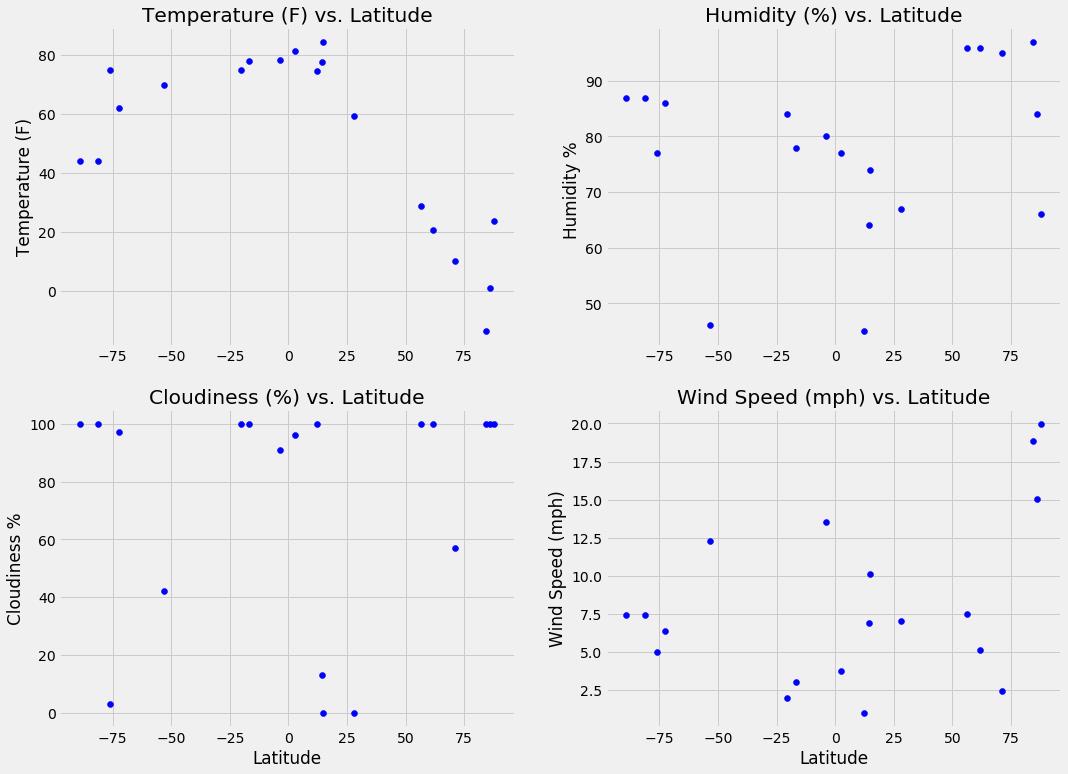

In [33]:
#Create Plots - Use Subplots

# create data for axes
lat   = df1['rand_lat'].to_list()
tempF = df1['Temperature_F'].to_list()
humdP = df1['Humidity_Perc'].to_list()
cldyP = df1['Cloudiness_Perc'].to_list()
winsM = df1['Wind_Speed_MPH'].to_list()


#plot data
plt.style.use('fivethirtyeight')
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows = 2, ncols = 2,figsize=(16,12))

ax1.scatter(lat,tempF, label = 'TempVLat', c = 'b' )
ax1.set_title('Temperature (F) vs. Latitude')
#ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')

ax2.scatter(lat,humdP, label = 'HumidityVLat' , c = 'b')
ax2.set_title('Humidity (%) vs. Latitude')
#ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity % ')

ax3.scatter(lat,cldyP, label = 'CldVLat' , c = 'b')
ax3.set_title('Cloudiness (%) vs. Latitude')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness %')

ax4.scatter(lat,winsM, label = 'WindVLat' , c = 'b')
ax4.set_title('Wind Speed (mph) vs. Latitude')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')

#plt.tight_layout()
plt.show()

fig.savefig('img/Latitude_Subplots.png')

In [104]:
#Create a function to plot the different measures vs latitiude in sub plots for Northern and Southern Hemispheres

def plotLatMeasure(cat, msr, x, y, w, z):
    
    """Create sub plots for notheren and southern  of latitudes and some other measure with linear regression
         Keyword arguments:
         cat = description of what is being measured. Used for overall title and export img naming
         msr = label of the measure which is being plotted against latitude
         x = a series of floats containing the northern hemisphere latitude values
         y = a series of floats containing the northern hemisphere measure
         w = a series of floats containing the southern hemisphere latitude values
         z = a series of floats containing the southern hemisphere measure
    
    """
    
    nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(
    x, y)
    nh_fit = nh_slope * x + nh_int
    
    sh_slope, sh_int, sh_r, sh_p, st_std_err = stats.linregress(
    w, z)
    sh_fit = sh_slope * w + sh_int


    nh_corr = stats.pearsonr(x,y)
    sh_corr = stats.pearsonr(w,z)
    
    nh_line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
    sh_line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

    
    # Plot
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,figsize=(14,7))
    fig.suptitle(cat, fontsize=14, fontweight="bold")
    

    ax1.scatter(x, y, linewidth=1, marker="o")
    ax1.plot(x, nt_fit, "b--", linewidth=1)
    plt.text(0.25, 0.15, sh_line_eq, fontweight="bold",fontsize=15, color="b", transform=ax1.transAxes)
    plt.text(0.25, 0.10, "r = " +str(round(nh_corr[0],2)), fontweight="bold",fontsize=15, color="b", transform=ax1.transAxes)
    ax1.set_title('Northern Hemisphere', fontsize=10)
    ax1.set_ylabel(msr, fontsize= 10)
    ax1.set_xlabel('Latitude', fontsize= 10)

    ax2.scatter(w, z, linewidth=1, marker="o", color="r")
    ax2.plot(w, st_fit, "r--", linewidth=1)
    plt.text(0.25, 0.15, sh_line_eq, fontweight="bold",fontsize=15, color="r", transform=ax2.transAxes)
    plt.text(0.25, 0.10, "r = " +str(round(sh_corr[0],2)), fontweight="bold",fontsize=15, color="r", transform=ax2.transAxes)
    ax2.set_title('Southern Hemisphere', fontsize=10)
    ax2.set_xlabel('Latitude', fontsize= 8)
    
    fig.savefig(f'img/Hemispheres_{msr}_vs_lat.png')
    
    plt.show()

    print(f'Correlation between latitude and {msr}: Northern Hemisphere {round(nh_corr[0],2)}, Southern Hemisphere {round(sh_corr[0],2)}')
 

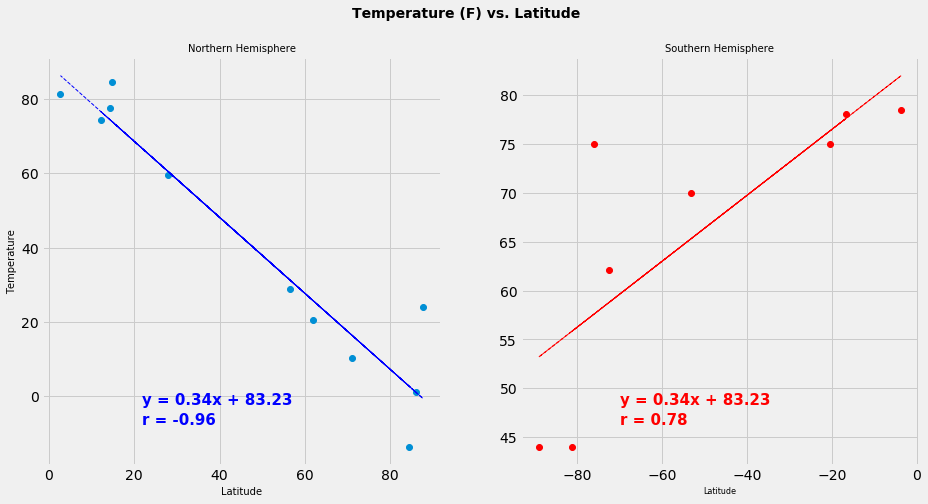

Correlation between latitude and Temperature: Northern Hemisphere -0.96, Southern Hemisphere 0.78


In [105]:
####Temperature (F) vs. Latitude####
cat = 'Temperature (F) vs. Latitude'
msr = 'Temperature'
#Northern Hemisphere 
x = nh_DF.iloc[:, 0].astype(float) #Latitude
y = nh_DF.iloc[:, 4].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 0].astype(float) #Latitude
z = sh_DF.iloc[:, 4].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

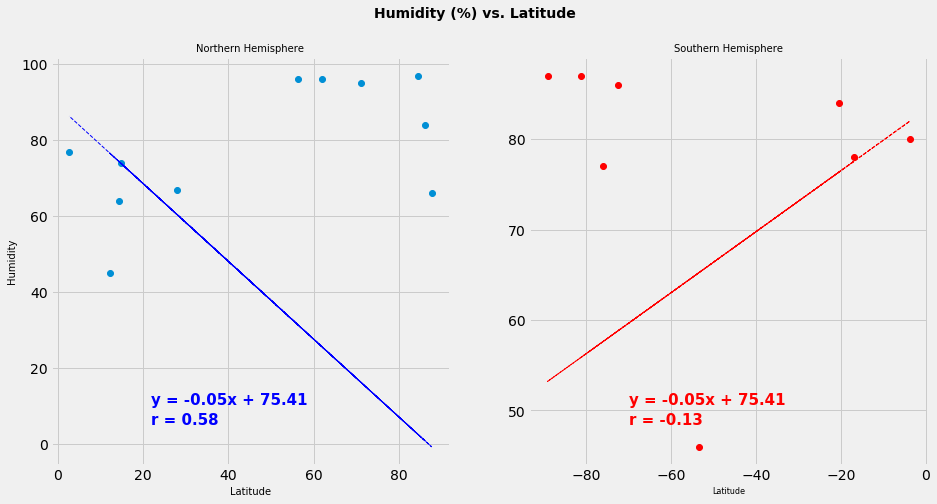

Correlation between latitude and Humidity: Northern Hemisphere 0.58, Southern Hemisphere -0.13


In [107]:
####Humidity (%) vs. Latitude####
cat = 'Humidity (%) vs. Latitude'
msr = 'Humidity'
#Northern Hemisphere 
x = nh_DF.iloc[:, 0].astype(float) #Latitude
y = nh_DF.iloc[:, 5].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 0].astype(float) #Latitude
z = sh_DF.iloc[:, 5].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

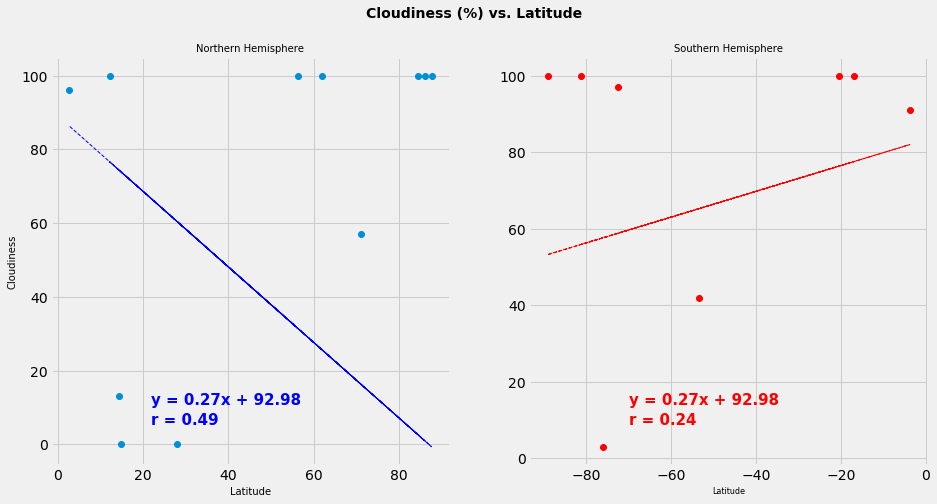

Correlation between latitude and Cloudiness: Northern Hemisphere 0.49, Southern Hemisphere 0.24


In [108]:
####Cloudiness (%) vs. Latitudee####
cat = 'Cloudiness (%) vs. Latitude'
msr = 'Cloudiness'
#Northern Hemisphere 
x = nh_DF.iloc[:, 0].astype(float) #Latitude
y = nh_DF.iloc[:, 6].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 0].astype(float) #Latitude
z = sh_DF.iloc[:, 6].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

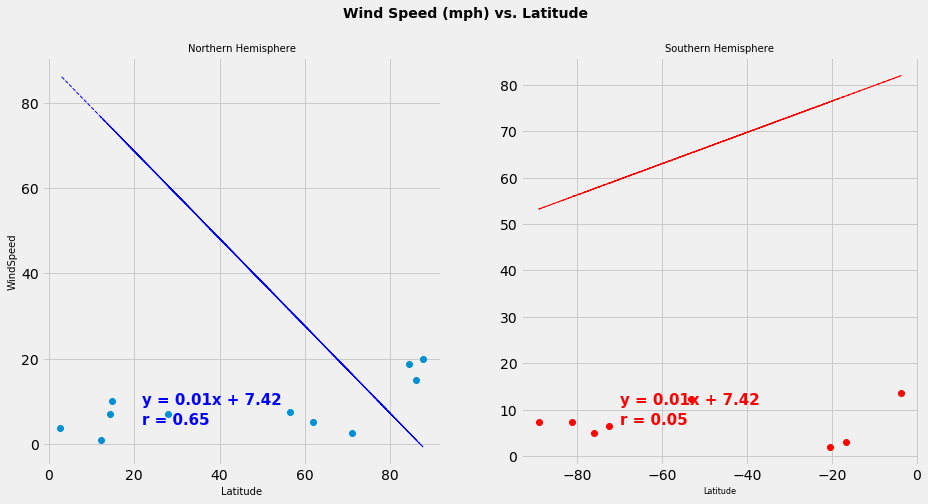

Correlation between latitude and WindSpeed: Northern Hemisphere 0.65, Southern Hemisphere 0.05


In [110]:
####Wind Speed (mph) vs. Latitude####
cat = 'Wind Speed (mph) vs. Latitude'
msr = 'WindSpeed'
#Northern Hemisphere 
x = nh_DF.iloc[:, 0].astype(float) #Latitude
y = nh_DF.iloc[:, 7].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 0].astype(float) #Latitude
z = sh_DF.iloc[:, 7].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

In [ ]:
# Export dataframe as a CSV
df1.to_csv('WeatherPY_Data.csv', index=False, header=True)